# Module70 Ensemble Techniques Ass4

Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link


In [15]:
# loading dataset

from google.colab import files

uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('dataset.csv')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Separating the independent and dependent features

In [19]:
x = df.drop('target', axis = 1)
y = df['target']

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.


A1. Preprocessing the dataset.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


As we can see there is no null data in our dataset.

All features are numerical, even categorical features are in numerical format. Hence there is no need to Feature tranformation from categorical to numerical features.

But let's check if there is need for Feature Scaling or not.

# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.plot_data[axis] = cat_data


<Axes: title={'center': 'After scaling'}>

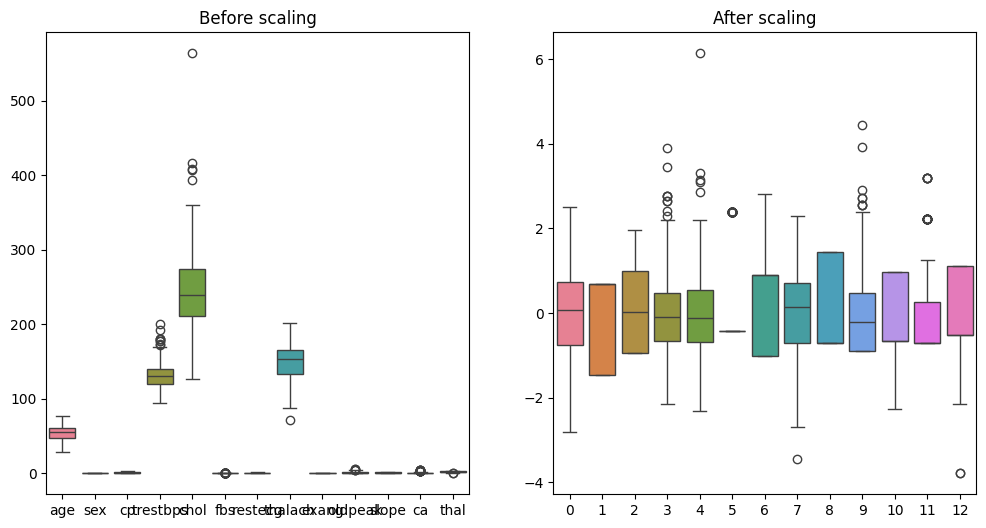

In [23]:
# Checking for Outliers

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.title('Before scaling')
sns.boxplot(data = x)

plt.subplot(1,2,2)
plt.title('After scaling')
sns.boxplot(data = x_scaled)

In [24]:
x = x_scaled

Q2. Split the dataset into a training set (70%) and a test set (30%).

A2. Splitting dataset into Training and Testing.

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

A3. Training a Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

A4. Evaluate the model

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred= classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 score: 0.8282828282828283


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

A5. Feature Importance Analysis

In [49]:
l = list(df.columns)
l.remove('target')

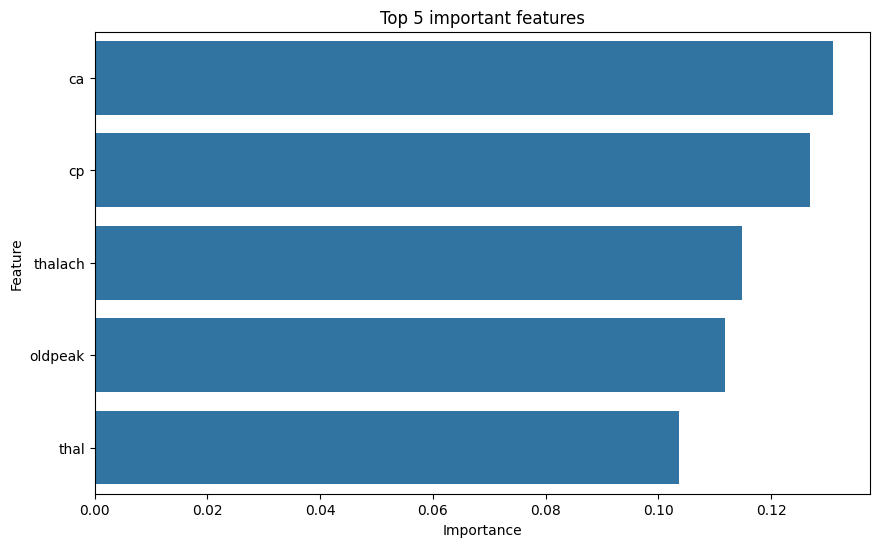

In [54]:
importance = classifier.feature_importances_
feature_importance_list = list(zip(l, importance))
feature_importance_list.sort(key = lambda x: x[1], reverse = True)

# Plot the top 5 features
top_features = feature_importance_list[:5]
plt.figure(figsize=(10, 6))

#plt.barh([x[0] for x in top_features], [x[1] for x in top_features])
#plt.xlabel('Feature Importance')

sns.barplot(x= 'Importance', y= 'Feature', data = pd.DataFrame(top_features, columns = ['Feature', 'Importance']))
plt.title('Top 5 important features')
plt.show()


Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

A6. Hyperparameter Tuning with GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

parameters= {
    'n_estimators' : [50, 100, 200],
    'max_depth': [10,20, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

classifier_cv = GridSearchCV(classifier, parameters, cv= 5, scoring = 'accuracy', verbose = 2)
classifier_cv.fit(x_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.


A7. Best Hyperparameters and Performance metrics


In [69]:
from sklearn.metrics import classification_report

best_classifier = classifier_cv.best_estimator_
best_parameters = classifier_cv.best_params_

y_pred_tuned = best_classifier.predict(x_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy before Hyperparameter Tuning:", accuracy)
print("Accuracy after Hyperparameter Tuning:", accuracy_tuned)

print("Best Hyperparameters:", classifier_cv.best_params_)

print("Performance of Default Model:")
print(classification_report(y_test, y_pred))

print("Performance of Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

# Compare default and tuned models
print(f"Default Model F1 Score: {f1:.2f}")
print(f"Tuned Model F1 Score: {f1_score(y_test, y_pred_tuned):.2f}")

Accuracy before Hyperparameter Tuning: 0.8131868131868132
Accuracy after Hyperparameter Tuning: 0.8131868131868132
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Performance of Default Model:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Performance of Tuned Model:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Default Model F1 Score: 0.83
Tuned Model F1 Score: 0.83


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

A8. Decision Boundaries

Top 5 Important Features:
    Feature  Importance
11       ca    0.130905
2        cp    0.126912
7   thalach    0.114802
9   oldpeak    0.111722
12     thal    0.103657


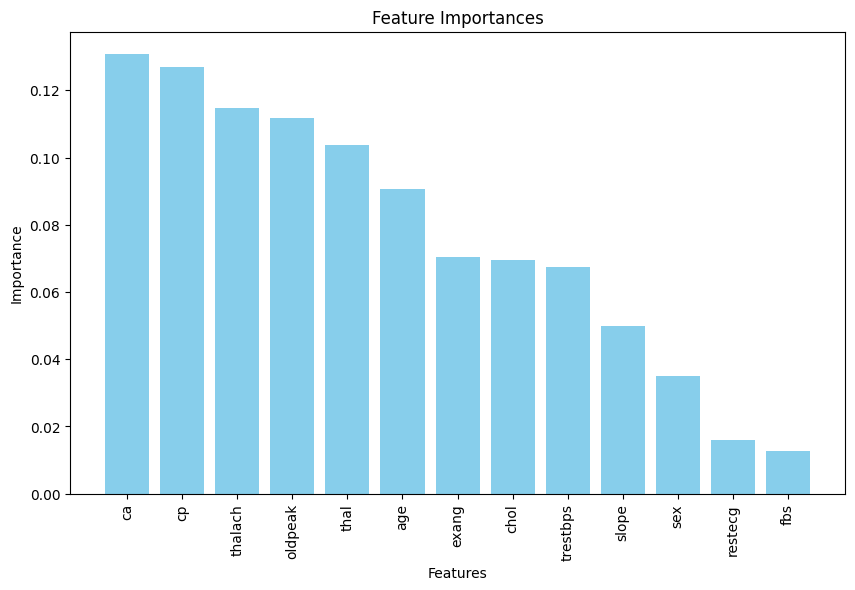

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


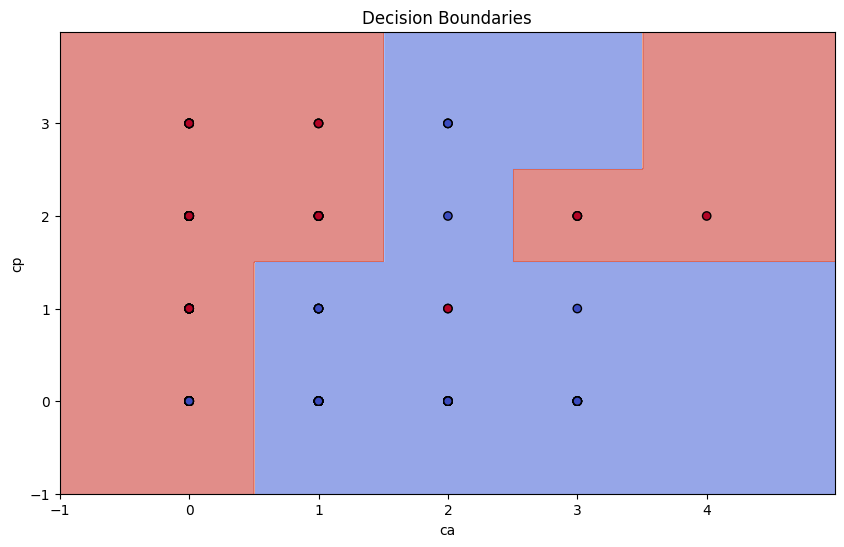

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming the dataset is already preprocessed into X and y
# Split the dataset into train and test
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
important_features = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
print("Top 5 Important Features:")
print(important_features.head())

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(important_features['Feature'], important_features['Importance'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Select the top 2 most important features
top_features = important_features['Feature'].iloc[:2].values

# Subset X_train and X_test using the top two features
X_train_2D = X_train[top_features]
X_test_2D = X_test[top_features]

# Train a random forest classifier on 2D data
rf_2D = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_2D.fit(X_train_2D, y_train)

# Create a meshgrid for decision boundaries
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = rf_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap="coolwarm")
plt.scatter(X_train_2D.iloc[:, 0], X_train_2D.iloc[:, 1], c=y_train, cmap="coolwarm", edgecolor='k')
plt.title('Decision Boundaries')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.show()
